## 3RCFU (Three Rivers Credit Federal Unit Data Analysis - Project Part I)

#### Census Neighborhood Metrics Table (First 33 Variables)

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import shutil
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr
%matplotlib inline

In [2]:
census = pyreadr.read_r('Data' + '/Census_Neighborhood_Metrics_Table.rds')[None] 
print(census.shape)
census.head()

(22230, 48)


,censuscode,Percent_Individual_Income_lt10K,Percent_Individual_Income_10to15K,Percent_Individual_Income_15to25K,Percent_Individual_Income_25to35K,Percent_Individual_Income_35to50K,Percent_Individual_Income_50to65K,Percent_Individual_Income_65to75K,Percent_Individual_Income_gte75K,Percent_Poverty,...,Household_Income_Mean_Second_Quintile,Household_Income_Mean_Third_Quintile,Household_Income_Mean_Fourth_Quintile,Household_Income_Mean_Highest_Quintile,GINI_Index,Household_Income_Median,GrossRent_Median,HousingUnit_Value_Median,RealEstate_Taxes_Median,MonthHousing_Costs_Median
0,GKA4709381,0.171642,0.210199,0.145833,0.167910,0.170398,0.028918,0.016169,0.028296,0.298324,...,21405.0,37354.0,67279.0,132295.0,0.4598,37378.0,1135.0,381700.0,1694.0,1072.0
1,XPG8453176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ILR6895472,0.123532,0.062636,0.150935,0.093519,0.112223,0.121140,0.048282,0.153763,0.057745,...,51172.0,75516.0,105506.0,276284.0,0.4691,77278.0,1027.0,192600.0,1451.0,852.0
3,JAM2038971,0.171086,0.079555,0.172797,0.131451,0.122612,0.063017,0.027659,0.109495,0.123284,...,34456.0,56621.0,83730.0,189191.0,0.4562,56433.0,713.0,123900.0,1423.0,745.0
4,GTE6315027,0.222871,0.121566,0.146635,0.075206,0.140797,0.078984,0.030907,0.019918,0.307053,...,18824.0,36884.0,56849.0,99446.0,0.4263,37152.0,573.0,60000.0,342.0,540.0


In [3]:
for col in census.columns:
    print(col)

censuscode
Percent_Individual_Income_lt10K
Percent_Individual_Income_10to15K
Percent_Individual_Income_15to25K
Percent_Individual_Income_25to35K
Percent_Individual_Income_35to50K
Percent_Individual_Income_50to65K
Percent_Individual_Income_65to75K
Percent_Individual_Income_gte75K
Percent_Poverty
Percent_neverMarried
Percent_Married
Percent_Education_HSgrad
Percent_Education_Somecollegeorassociate
Percent_Education_Bachelor
Percent_Education_Graduateorprofessionaldegree
Percent_FoodStamps_Household
Percent_GovAsst_Child_Household_SSI_SNAP_CPAI
Percent_Unemployed
Percent_Family_Poverty
Percent_Medicaid
Percent_HomeOwner
Percent_Foreign_Born
Percent_JobSector_Gov
Percent_JobSector_SelfEmploy
Population_Density
Percent_Black
Percent_Native_American
Percent_Asian
Percent_Pacific_Islander
Percent_Other
Percent_gteTwoRaces
Percent_Hispanic
Percent_Age_lt18
Percent_Age_18to24
Percent_Age_gte65
Income_Median
Household_Income_Mean_Lowest_Quintile
Household_Income_Mean_Second_Quintile
Household_In

# Selection of Desired Population:
1. Filtered out customers greater than equal to 18 years of age at the time of joining 
2. Filtered out customers whose account type is personal
3. Filtered out customers who are members for at least 3 months.

In [4]:
# Deserializing/Loading the filtered `customerid` from the pickle format
with open('Data' + '/useful_customers_list.pkl', "rb") as input_file:
    deserialized_data = pickle.load(input_file)

In [5]:
# Read `Census_Neigborhood_Metrics_Table.rds` data
result = pyreadr.read_r('Data' + '/Census_Neighborhood_Metrics_Table.rds')

# Extract the DataFrame from the dictionary
df = result[None]

# Select the first 33 columns from census table in order to perform EDA only on these columns.
censusNeighborhoodData = df.iloc[:,:33]

# Perform exploratory data analysis (EDA) on the selected columns
print(censusNeighborhoodData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22230 entries, 0 to 22229
Data columns (total 33 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   censuscode                                      22230 non-null  object 
 1   Percent_Individual_Income_lt10K                 19215 non-null  float64
 2   Percent_Individual_Income_10to15K               19215 non-null  float64
 3   Percent_Individual_Income_15to25K               19215 non-null  float64
 4   Percent_Individual_Income_25to35K               19215 non-null  float64
 5   Percent_Individual_Income_35to50K               19215 non-null  float64
 6   Percent_Individual_Income_50to65K               19215 non-null  float64
 7   Percent_Individual_Income_65to75K               19215 non-null  float64
 8   Percent_Individual_Income_gte75K                19215 non-null  float64
 9   Percent_Poverty                        

In [6]:
df.describe()

,Percent_Individual_Income_lt10K,Percent_Individual_Income_10to15K,Percent_Individual_Income_15to25K,Percent_Individual_Income_25to35K,Percent_Individual_Income_35to50K,Percent_Individual_Income_50to65K,Percent_Individual_Income_65to75K,Percent_Individual_Income_gte75K,Percent_Poverty,Percent_neverMarried,...,Household_Income_Mean_Second_Quintile,Household_Income_Mean_Third_Quintile,Household_Income_Mean_Fourth_Quintile,Household_Income_Mean_Highest_Quintile,GINI_Index,Household_Income_Median,GrossRent_Median,HousingUnit_Value_Median,RealEstate_Taxes_Median,MonthHousing_Costs_Median
count,19215.000000,19215.000000,19215.000000,19215.000000,19215.000000,19215.000000,19215.000000,19215.000000,19213.000000,19215.000000,...,18046.000000,18046.000000,18046.000000,1.804600e+04,19174.000000,19145.000000,18286.000000,1.887400e+04,18833.000000,19162.000000
mean,0.135743,0.076392,0.129435,0.114693,0.129263,0.095111,0.042516,0.160949,0.117601,0.313002,...,46857.838801,72801.235897,106849.683974,2.074806e+05,0.410815,72599.235205,1157.980969,2.516221e+05,2844.663888,1192.637773
std,0.055477,0.035296,0.049255,0.042436,0.043414,0.036405,0.023721,0.108931,0.097226,0.122672,...,22048.916459,32014.426985,46170.248393,1.048074e+05,0.066206,32181.827219,477.917831,1.920987e+05,2175.927090,507.711833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006609,...,3121.000000,9724.000000,16342.000000,3.225700e+04,0.077400,2499.000000,99.000000,9.999000e+03,199.000000,228.000000
25%,0.101804,0.051340,0.094073,0.085115,0.100133,0.070225,0.025781,0.078137,0.049135,0.230906,...,31350.250000,50721.250000,76183.250000,1.418610e+05,0.365600,50504.000000,814.000000,1.376000e+05,1309.000000,825.000000
50%,0.127421,0.071639,0.126325,0.112343,0.127521,0.093596,0.040030,0.135014,0.090528,0.288938,...,42470.000000,66199.000000,96685.000000,1.802670e+05,0.405100,66004.000000,1045.000000,2.005500e+05,2186.000000,1079.000000
75%,0.158771,0.096345,0.160192,0.140823,0.156383,0.117245,0.055876,0.223396,0.157683,0.372253,...,57466.000000,88041.000000,126288.000000,2.415918e+05,0.449600,88137.000000,1388.000000,3.042750e+05,3684.000000,1441.000000
max,0.789583,0.380843,0.569378,0.479643,0.514317,0.338158,0.386813,0.790704,1.000000,1.000000,...,208334.000000,305884.000000,552783.000000,1.201849e+06,0.760100,250001.000000,3501.000000,2.000001e+06,10001.000000,4001.000000


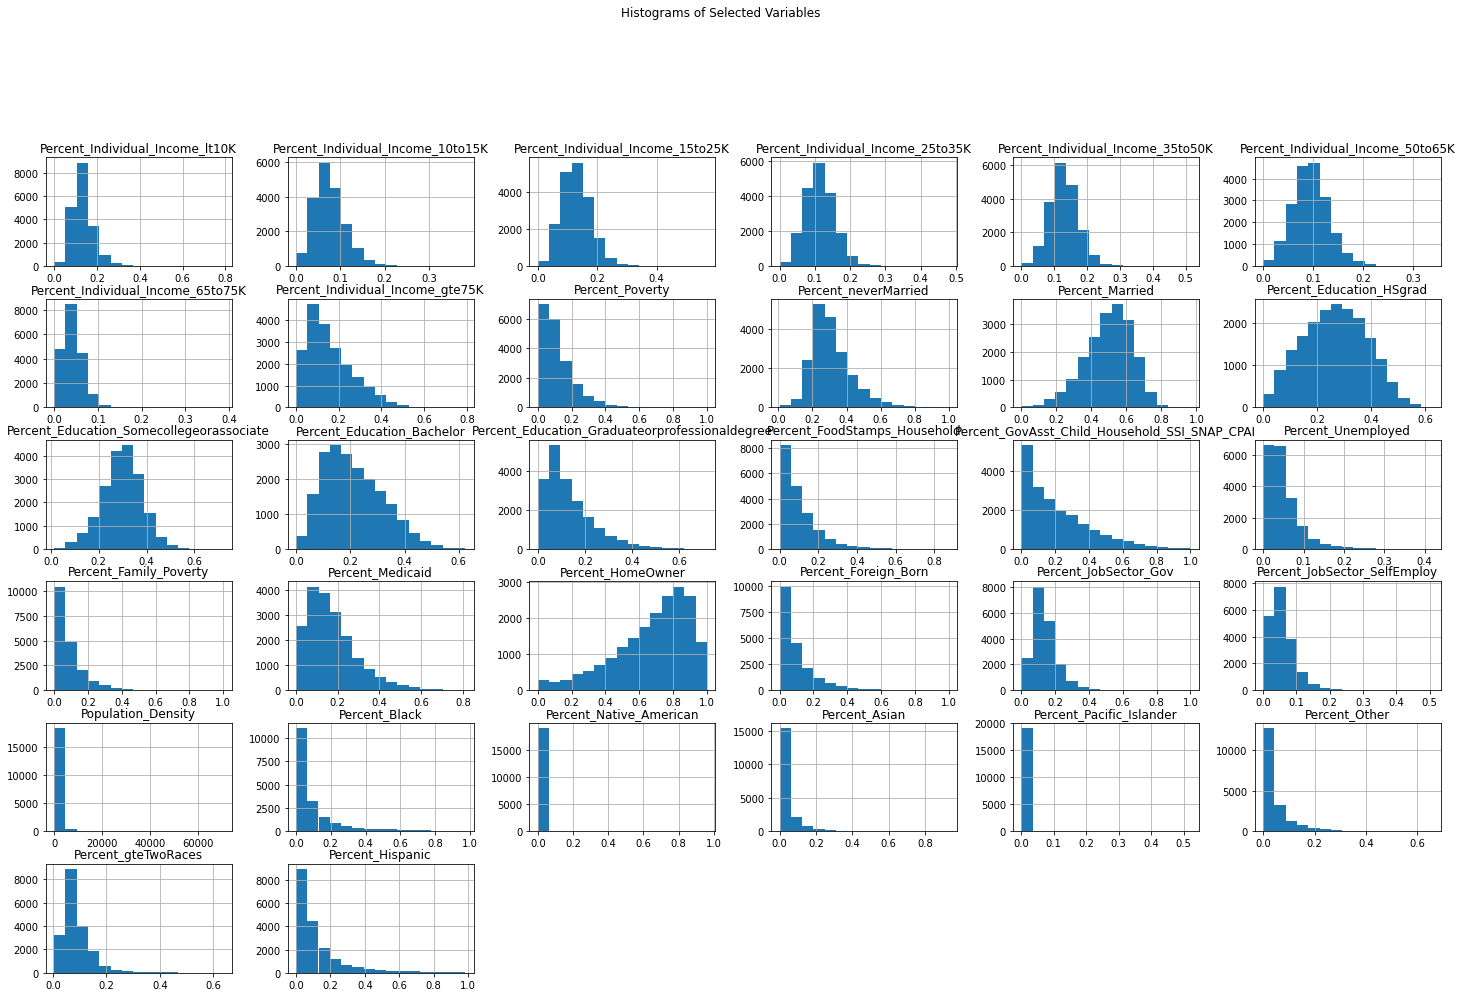

In [7]:
# # Histograms to visualize the distribution
censusNeighborhoodData.hist(bins=15, figsize=(25, 15))
plt.suptitle("Histograms of Selected Variables", y=1.02)
plt.show()

## 1. Insights for Censuscode

In [8]:
len(np.unique(censusNeighborhoodData.censuscode.value_counts().index))

22230

In [9]:
censusNeighborhoodData.shape

(22230, 33)

**Summary:**

The census code serves as a unique identifier in the table with 22,230 rows

## 2. Insights for Percentage of Indiviaduals with income less than 10k

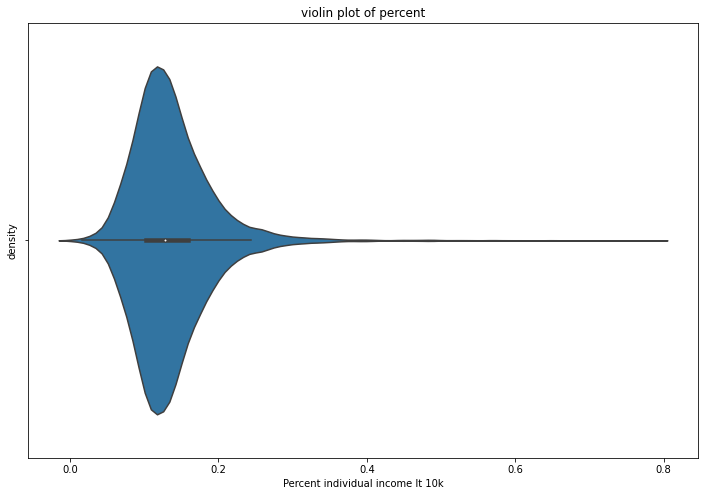

count    19215.000000
mean         0.135743
std          0.055477
min          0.000000
25%          0.101804
50%          0.127421
75%          0.158771
max          0.789583
Name: Percent_Individual_Income_lt10K, dtype: float64

In [10]:
# Violin plot to visualize the distribution
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_Individual_Income_lt10K', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent individual income lt 10k', ylabel= 'density', title='violin plot of percent')
plt.show()

# Display basic statistics for the selected column
censusNeighborhoodData.Percent_Individual_Income_lt10K.describe()

**Summary:**

Within the dataset encompassing 19,215 records, the analysis focuses on the percentage of individuals earning less than $10,000. The data reveals an average of 13.57% for this category, indicating a notable portion of the population with relatively low incomes. The distribution is slightly skewed to the right, as evidenced by the higher mean (13.57%) compared to the median (12.74%). This suggests that while a significant proportion of individuals earn moderately low incomes, there are fewer with extremely low incomes. The dataset displays a moderate level of variability, with a standard deviation of 5.55%, signifying fluctuations around the mean. However, attention is warranted towards potential outliers, particularly those above the 75th percentile (15.88%), indicating a need for further scrutiny. The presence of a minimum value of 0% suggests the existence of individuals with no income, emphasizing the importance of data integrity checks. A nuanced exploration, considering contextual factors, is essential for a comprehensive understanding of the income disparities reflected in this dataset.

## 3.Insights for Percentage of Indiviaduals with income between 10k and 15k

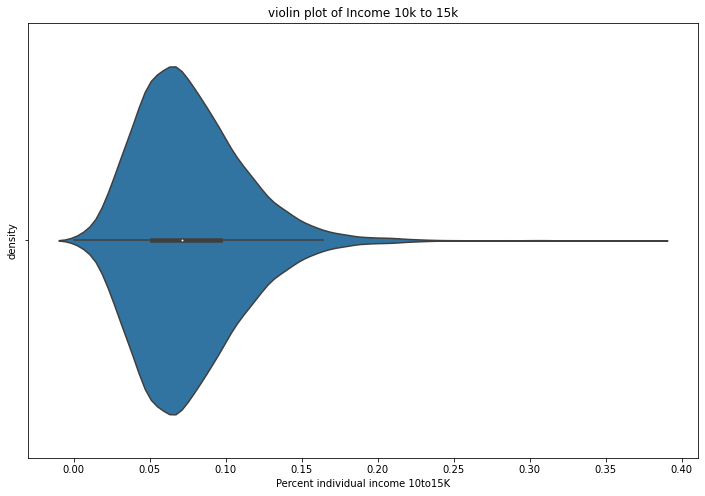

count    19215.000000
mean         0.076392
std          0.035296
min          0.000000
25%          0.051340
50%          0.071639
75%          0.096345
max          0.380843
Name: Percent_Individual_Income_10to15K, dtype: float64

In [11]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_Individual_Income_10to15K', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent individual income 10to15K', ylabel= 'density', title='violin plot of Income 10k to 15k')
plt.show()

censusNeighborhoodData.Percent_Individual_Income_10to15K.describe()

**Summary:**

In this dataset of 19,215 records, 7.64% of individuals earn between $10,000 and $15,000. The data shows a Z-curve pattern around the mean, with a minimum of 0% indicating individuals with no income in this range. Attention is required for outliers above the 75th percentile (9.63%).

## 4.Insights for Percentage of Individuals with income between 15k and 25k

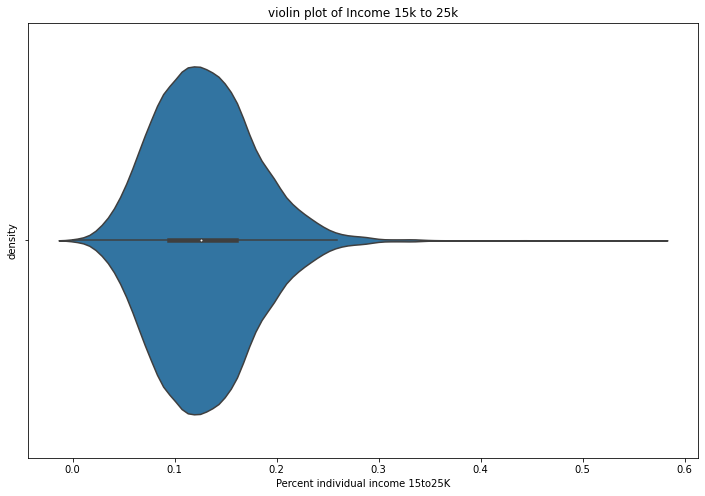

count    19215.000000
mean         0.129435
std          0.049255
min          0.000000
25%          0.094073
50%          0.126325
75%          0.160192
max          0.569378
Name: Percent_Individual_Income_15to25K, dtype: float64

In [14]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_Individual_Income_15to25K', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent individual income 15to25K', ylabel= 'density', title='violin plot of Income 15k to 25k')
plt.show()

censusNeighborhoodData.Percent_Individual_Income_15to25K.describe()

**Summary:**

In the dataset of 19,215 records, 12.94% of individuals earn betweew 15k and 25k. The data spans from 0% to 56.94%, indicating diverse income levels. The median value is 12.63%, showing a balanced distribution, with potential outliers above the 75th percentile.

## 5.Insights for Percentage of Individuals with income between 25k and 35k

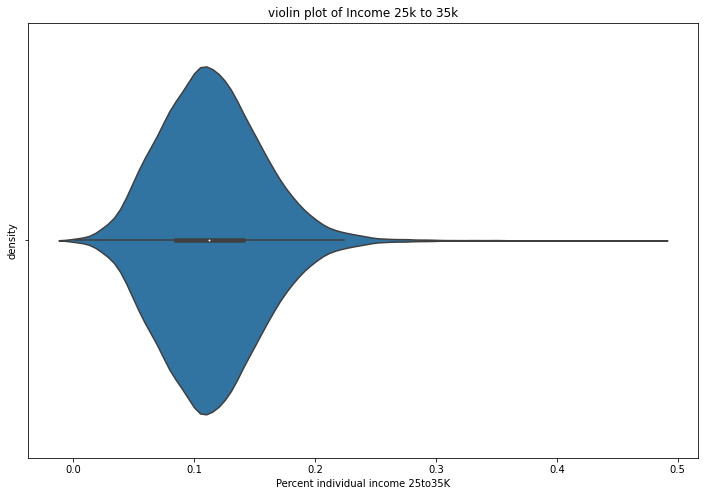

count    19215.000000
mean         0.114693
std          0.042436
min          0.000000
25%          0.085115
50%          0.112343
75%          0.140823
max          0.479643
Name: Percent_Individual_Income_25to35K, dtype: float64

In [15]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_Individual_Income_25to35K', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent individual income 25to35K', ylabel= 'density', title='violin plot of Income 25k to 35k')
plt.show()

# print("Statistical measures:")
censusNeighborhoodData.Percent_Individual_Income_25to35K.describe()

**Summary:**

In the dataset comprising 19,215 records, 11.47% of individuals earn between $25,000 and $35,000 on average. The data, ranging from 0% to 47.96%, demonstrates diverse income levels. The median value of 11.23% indicates a balanced distribution, with the interquartile range spanning from 8.51% to 14.08%. Outliers are present above the 75th percentile. 

## 6.Insights for Percentage of Individuals with income between 35k and 50k

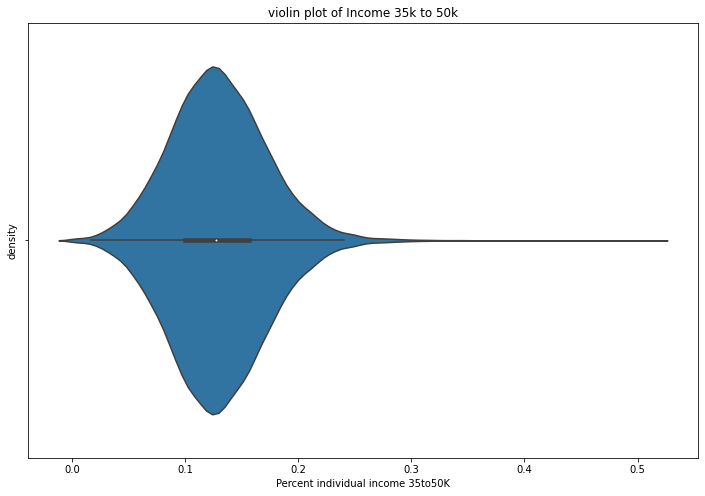

count    19215.000000
mean         0.129263
std          0.043414
min          0.000000
25%          0.100133
50%          0.127521
75%          0.156383
max          0.514317
Name: Percent_Individual_Income_35to50K, dtype: float64

In [ ]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_Individual_Income_35to50K', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent individual income 35to50K', ylabel= 'density', title='violin plot of Income 35k to 50k')
plt.show()

censusNeighborhoodData.Percent_Individual_Income_35to50K.describe()

**Summary:**

In the dataset of 19,215 records, 12.93% of individuals earn between $35k and $50k. The data ranges from 0% to 51.43%, indicating diverse income levels. Median income is 12.75%, and outliers exist above the 75th percentile. 

## 8.Insights for Percentage of Individuals with income between 50k and 65k

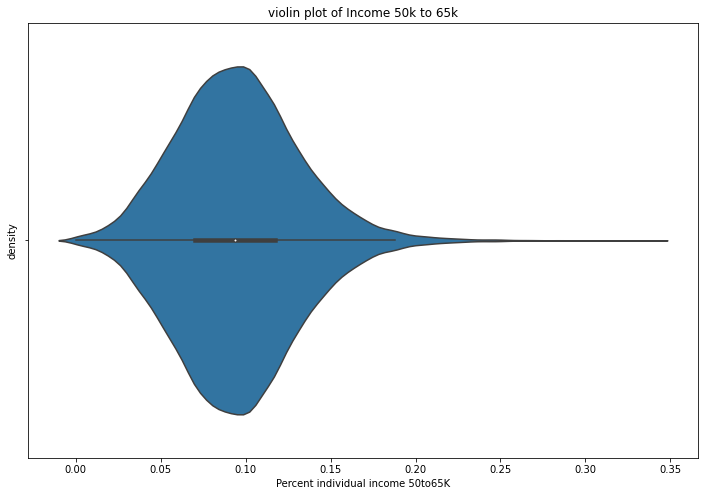

count    19215.000000
mean         0.095111
std          0.036405
min          0.000000
25%          0.070225
50%          0.093596
75%          0.117245
max          0.338158
Name: Percent_Individual_Income_50to65K, dtype: float64

In [19]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_Individual_Income_50to65K', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent individual income 50to65K', ylabel= 'density', title='violin plot of Income 50k to 65k')
plt.show()

censusNeighborhoodData.Percent_Individual_Income_50to65K.describe()

**Summary:**

In the dataset of 19,215 records, the average percentage of individuals earning between $50,000 and $65,000 is 9.51%. The data, ranging from 0% to 33.82%, reflects varying income levels. The median value of 9.36% indicates a balanced distribution, with the interquartile range spanning from 7.02% to 11.72%. Notably, outliers exist above the 75th percentile. 

## 9.Insights for Percentage of Individuals with income between 65k and 75k

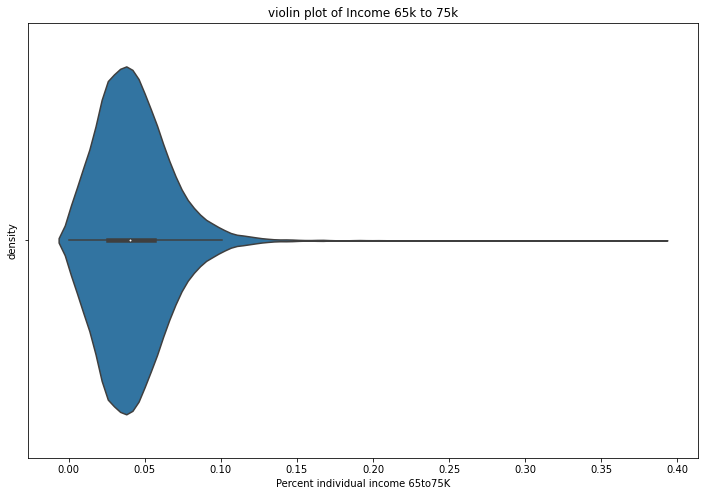

count    19215.000000
mean         0.042516
std          0.023721
min          0.000000
25%          0.025781
50%          0.040030
75%          0.055876
max          0.386813
Name: Percent_Individual_Income_65to75K, dtype: float64

In [21]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_Individual_Income_65to75K', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent individual income 65to75K', ylabel= 'density', title='violin plot of Income 65k to 75k')
plt.show()

censusNeighborhoodData.Percent_Individual_Income_65to75K.describe()

**Summary:**

In the dataset of 19,215 records, the average percentage of individuals earning between $65,000 and $75,000 is 4.25%. The data, ranging from 0% to 38.68%, indicates varied income levels. The median value of 4.00% suggests a balanced distribution, with the interquartile range spanning from 2.58% to 5.59%. Notably, there are outliers above the 75th percentile. 

## 10.Insights for Percentage of Individuals with income greater than 75k

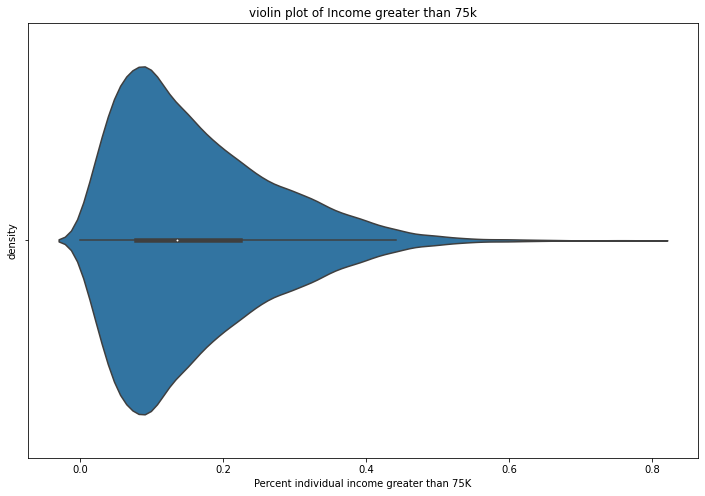

count    19215.000000
mean         0.160949
std          0.108931
min          0.000000
25%          0.078137
50%          0.135014
75%          0.223396
max          0.790704
Name: Percent_Individual_Income_gte75K, dtype: float64

In [22]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_Individual_Income_gte75K', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent individual income greater than 75K', ylabel= 'density', title='violin plot of Income greater than 75k')
plt.show()

censusNeighborhoodData.Percent_Individual_Income_gte75K.describe()

**Summary:**

In the dataset containing 19,215 records, the average percentage of individuals earning $75,000 or more is 16.09%. The data ranges widely from 0% to 79.07%, indicating significant income disparities. The median value of 13.50% suggests a diverse distribution, with the interquartile range spanning from 7.81% to 22.34%. Notably, there are outliers above the 75th percentile. Further analysis will provide in-depth insights into this higher income bracket.

## 11. Insights for Percentage of Poverty

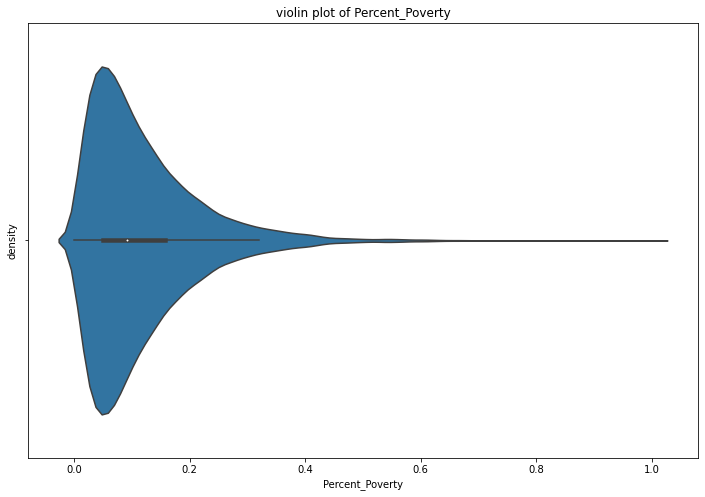

count    19213.000000
mean         0.117601
std          0.097226
min          0.000000
25%          0.049135
50%          0.090528
75%          0.157683
max          1.000000
Name: Percent_Poverty, dtype: float64

In [23]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_Poverty', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent_Poverty', ylabel= 'density', title='violin plot of Percent_Poverty')
plt.show()

censusNeighborhoodData.Percent_Poverty.describe()

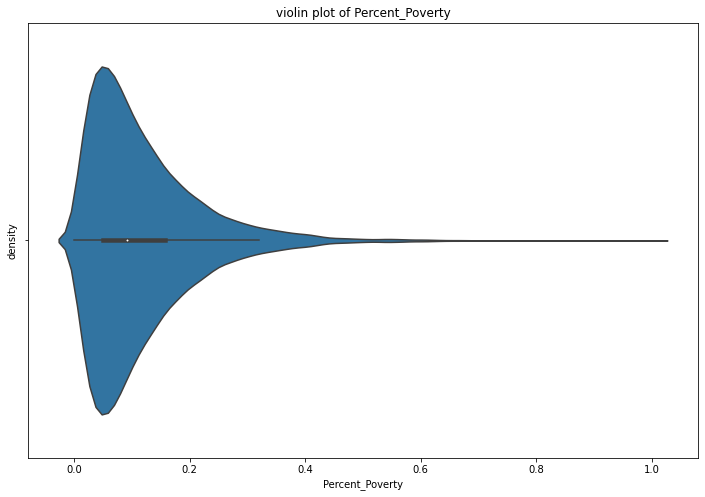

count    19213.000000
mean         0.117601
std          0.097226
min          0.000000
25%          0.049135
50%          0.090528
75%          0.157683
max          1.000000
Name: Percent_Poverty, dtype: float64

In [23]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_Poverty', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent_Poverty', ylabel= 'density', title='violin plot of Percent_Poverty')
plt.show()

censusNeighborhoodData.Percent_Poverty.describe()

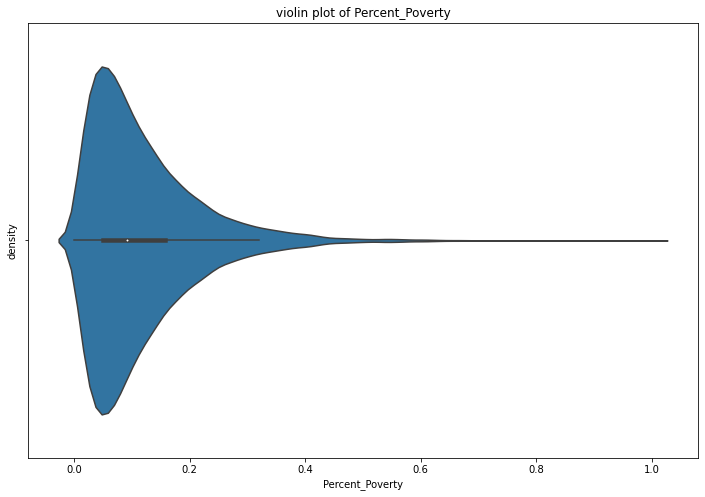

count    19213.000000
mean         0.117601
std          0.097226
min          0.000000
25%          0.049135
50%          0.090528
75%          0.157683
max          1.000000
Name: Percent_Poverty, dtype: float64

In [23]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_Poverty', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent_Poverty', ylabel= 'density', title='violin plot of Percent_Poverty')
plt.show()

censusNeighborhoodData.Percent_Poverty.describe()

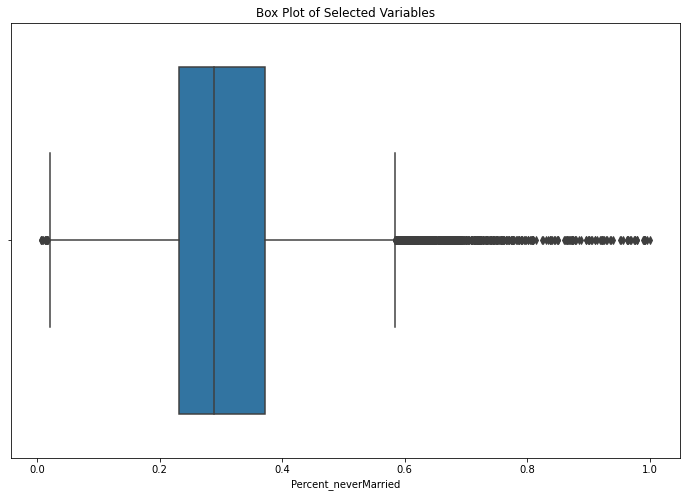

count    19215.000000
mean         0.313002
std          0.122672
min          0.006609
25%          0.230906
50%          0.288938
75%          0.372253
max          1.000000
Name: Percent_neverMarried, dtype: float64

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Percent_neverMarried', data=censusNeighborhoodData, orient="h")
plt.title("Box Plot of Selected Variables")
plt.show()

censusNeighborhoodData.Percent_neverMarried.describe()

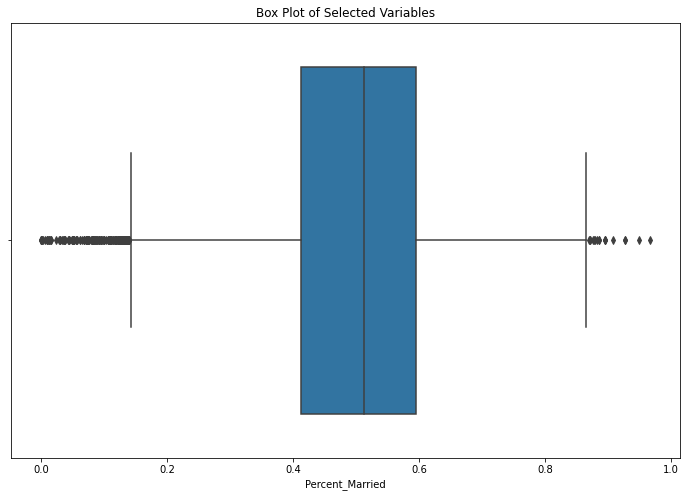

count    19215.000000
mean         0.497637
std          0.135097
min          0.000000
25%          0.413054
50%          0.511662
75%          0.595062
max          0.966038
Name: Percent_Married, dtype: float64

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Percent_Married', data=censusNeighborhoodData, orient="h")
plt.title("Box Plot of Selected Variables")
plt.show()

censusNeighborhoodData.Percent_Married.describe()

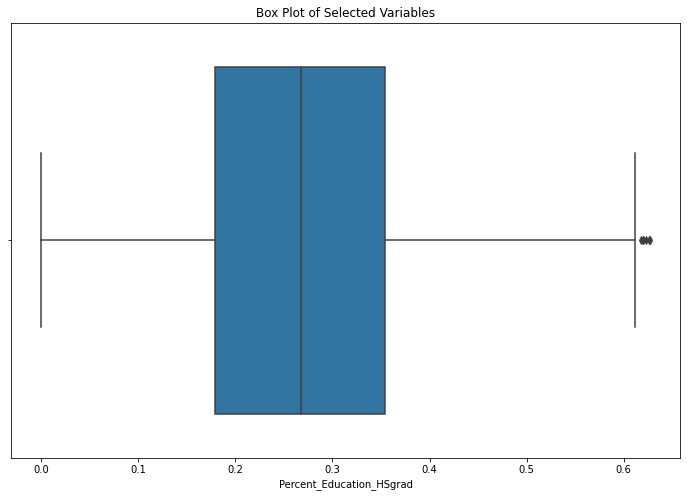

count    19214.000000
mean         0.267094
std          0.116997
min          0.000000
25%          0.179182
50%          0.267690
75%          0.353676
max          0.626919
Name: Percent_Education_HSgrad, dtype: float64

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Percent_Education_HSgrad', data=censusNeighborhoodData, orient="h")
plt.title("Box Plot of Selected Variables")
plt.show()

censusNeighborhoodData.Percent_Education_HSgrad.describe()

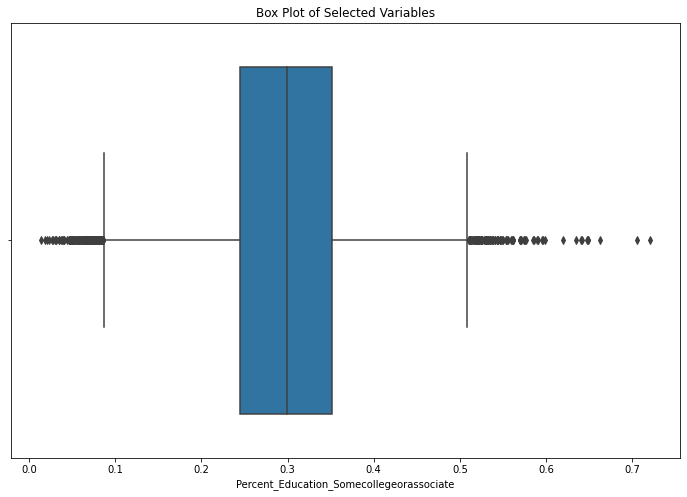

count    19214.000000
mean         0.296976
std          0.082117
min          0.013951
25%          0.245320
50%          0.299754
75%          0.351231
max          0.720539
Name: Percent_Education_Somecollegeorassociate, dtype: float64

In [27]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Percent_Education_Somecollegeorassociate', data=censusNeighborhoodData, orient="h")
plt.title("Box Plot of Selected Variables")
plt.show()

censusNeighborhoodData.Percent_Education_Somecollegeorassociate.describe()

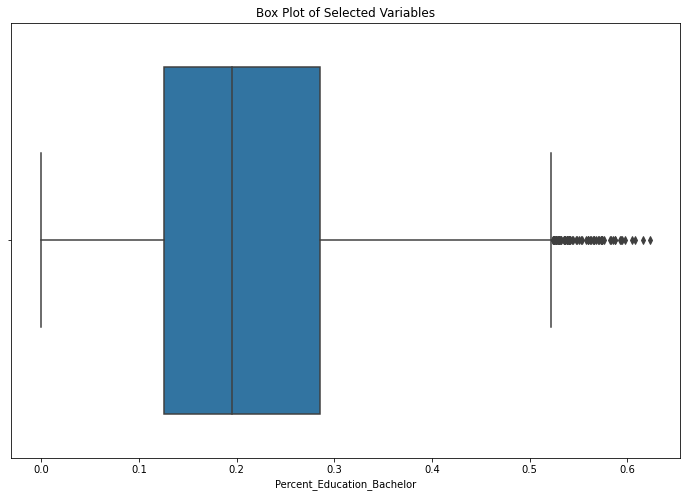

count    19214.000000
mean         0.211222
std          0.107577
min          0.000000
25%          0.126133
50%          0.195715
75%          0.285051
max          0.623100
Name: Percent_Education_Bachelor, dtype: float64

In [28]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Percent_Education_Bachelor', data=censusNeighborhoodData, orient="h")
plt.title("Box Plot of Selected Variables")
plt.show()

censusNeighborhoodData.Percent_Education_Bachelor.describe()

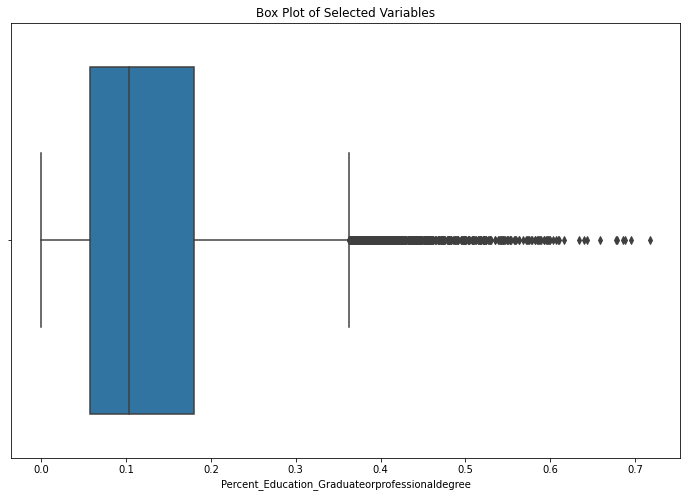

count    19214.000000
mean         0.131561
std          0.099704
min          0.000000
25%          0.057771
50%          0.104092
75%          0.179733
max          0.717455
Name: Percent_Education_Graduateorprofessionaldegree, dtype: float64

In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Percent_Education_Graduateorprofessionaldegree', data=censusNeighborhoodData, orient="h")
plt.title("Box Plot of Selected Variables")
plt.show()

censusNeighborhoodData.Percent_Education_Graduateorprofessionaldegree.describe()

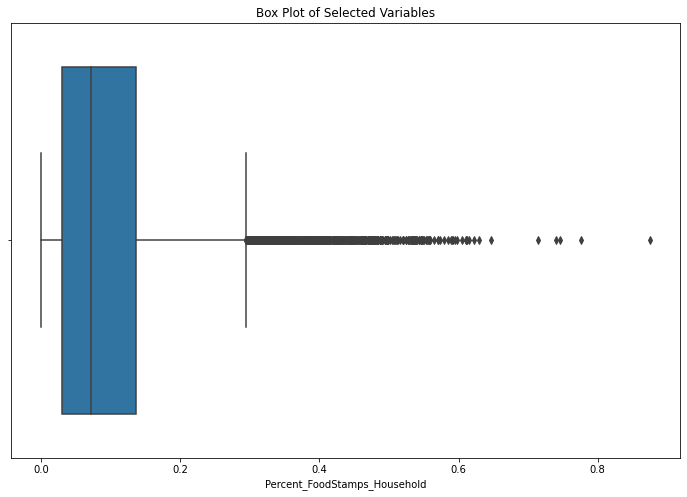

count    19214.000000
mean         0.097835
std          0.093611
min          0.000000
25%          0.030482
50%          0.071087
75%          0.136094
max          0.875000
Name: Percent_FoodStamps_Household, dtype: float64

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Percent_FoodStamps_Household', data=censusNeighborhoodData, orient="h")
plt.title("Box Plot of Selected Variables")
plt.show()

censusNeighborhoodData.Percent_FoodStamps_Household.describe()

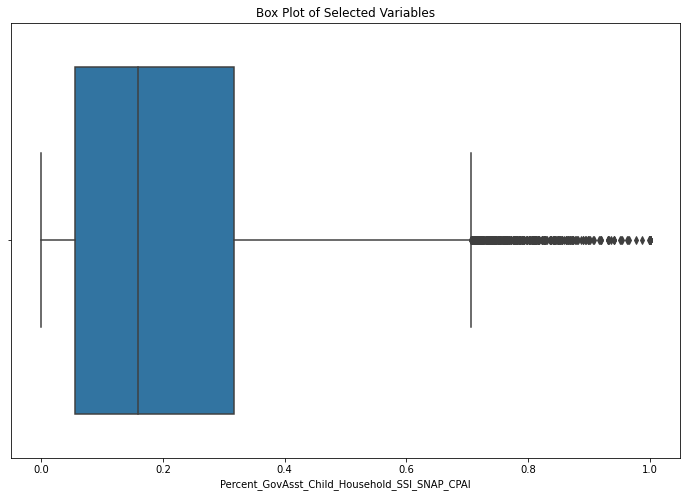

count    19123.000000
mean         0.209618
std          0.190858
min          0.000000
25%          0.056246
50%          0.159119
75%          0.316269
max          1.000000
Name: Percent_GovAsst_Child_Household_SSI_SNAP_CPAI, dtype: float64

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Percent_GovAsst_Child_Household_SSI_SNAP_CPAI', data=censusNeighborhoodData, orient="h")
plt.title("Box Plot of Selected Variables")
plt.show()

censusNeighborhoodData.Percent_GovAsst_Child_Household_SSI_SNAP_CPAI.describe()

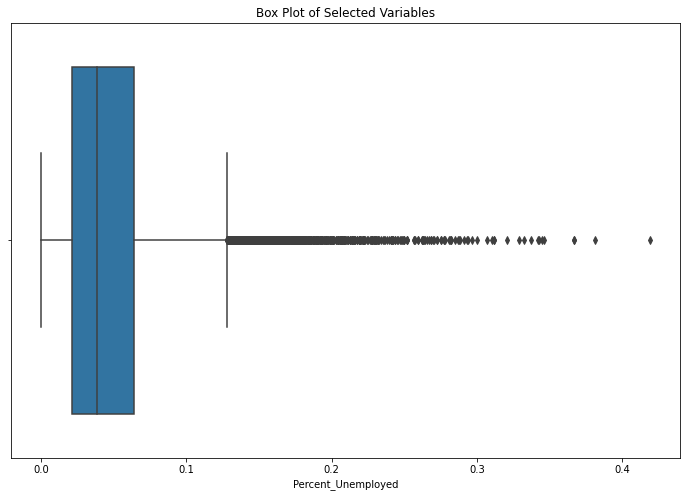

count    19214.000000
mean         0.048256
std          0.039861
min          0.000000
25%          0.021520
50%          0.038682
75%          0.063999
max          0.418856
Name: Percent_Unemployed, dtype: float64

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Percent_Unemployed', data=censusNeighborhoodData, orient="h")
plt.title("Box Plot of Selected Variables")
plt.show()

censusNeighborhoodData.Percent_Unemployed.describe()

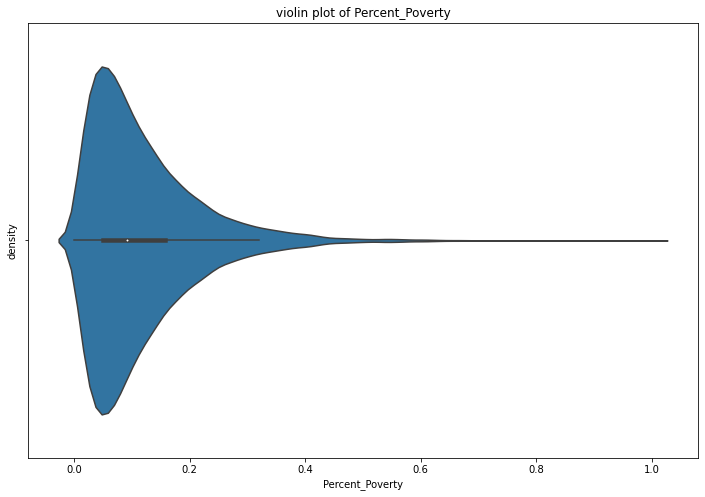

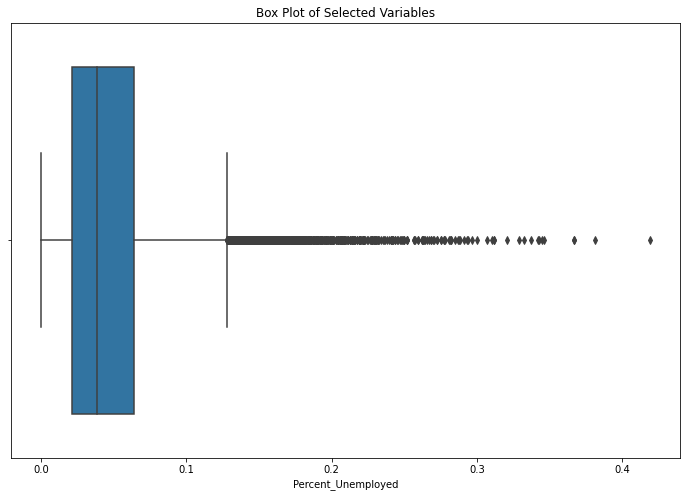

count    19214.000000
mean         0.048256
std          0.039861
min          0.000000
25%          0.021520
50%          0.038682
75%          0.063999
max          0.418856
Name: Percent_Unemployed, dtype: float64

In [33]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_Poverty', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent_Poverty', ylabel= 'density', title='violin plot of Percent_Poverty')
plt.show()

censusNeighborhoodData.Percent_Poverty.describe()

plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Percent_Unemployed', data=censusNeighborhoodData, orient="h")
plt.title("Box Plot of Selected Variables")
plt.show()

censusNeighborhoodData.Percent_Unemployed.describe()

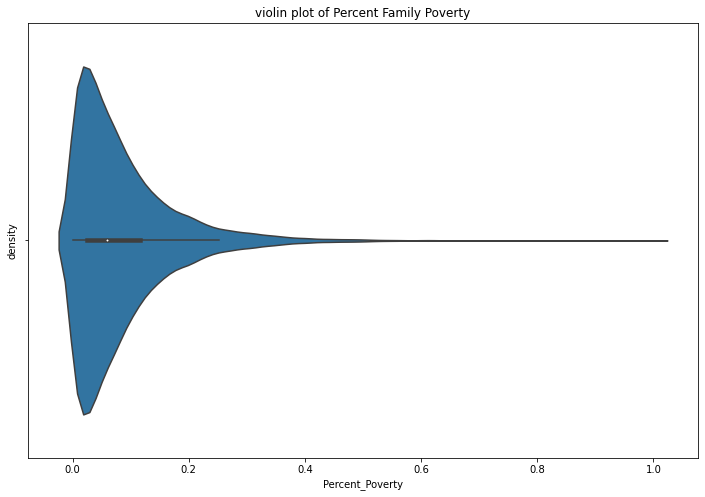

count    19210.000000
mean         0.084582
std          0.086832
min          0.000000
25%          0.024492
50%          0.058936
75%          0.115291
max          1.000000
Name: Percent_Family_Poverty, dtype: float64

In [34]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_Family_Poverty', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent_Poverty', ylabel= 'density', title='violin plot of Percent Family Poverty')
plt.show()

censusNeighborhoodData.Percent_Family_Poverty.describe()

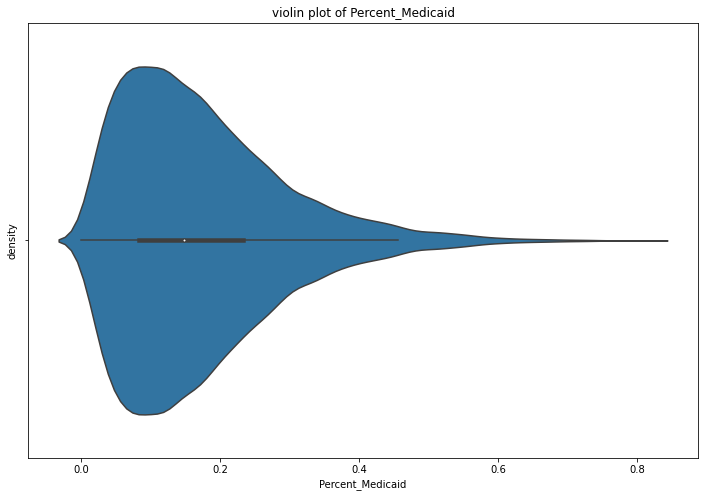

count    19215.000000
mean         0.171585
std          0.117181
min          0.000000
25%          0.083204
50%          0.147368
75%          0.231932
max          0.810443
Name: Percent_Medicaid, dtype: float64

In [35]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_Medicaid', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent_Medicaid', ylabel= 'density', title='violin plot of Percent_Medicaid')
plt.show()

censusNeighborhoodData.Percent_Medicaid.describe()

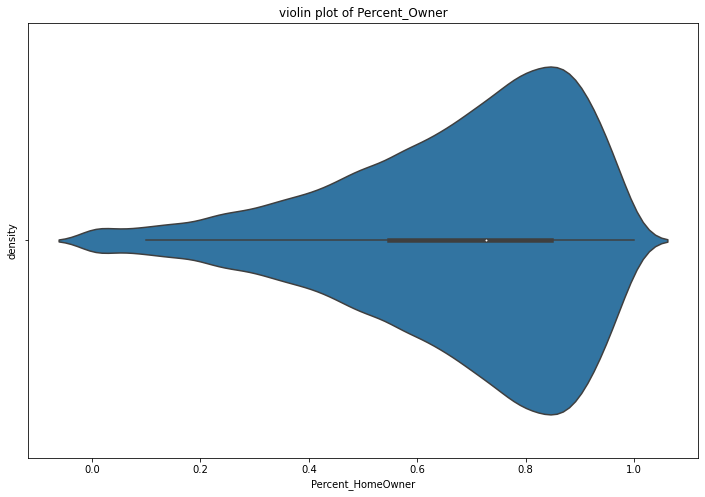

count    19218.000000
mean         0.675696
std          0.220651
min          0.000000
25%          0.547934
50%          0.727273
75%          0.847084
max          1.000000
Name: Percent_HomeOwner, dtype: float64

In [37]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_HomeOwner', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent_HomeOwner', ylabel= 'density', title='violin plot of Percent_Owner')
plt.show()

censusNeighborhoodData.Percent_HomeOwner.describe()

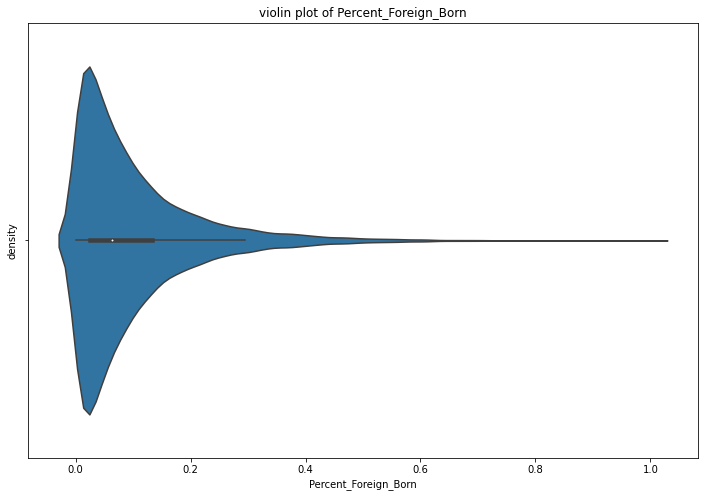

count    19219.000000
mean         0.098396
std          0.106120
min          0.000000
25%          0.024683
50%          0.062903
75%          0.132918
max          1.000000
Name: Percent_Foreign_Born, dtype: float64

In [38]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_Foreign_Born', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent_Foreign_Born', ylabel= 'density', title='violin plot of Percent_Foreign_Born')
plt.show()

censusNeighborhoodData.Percent_Foreign_Born.describe()

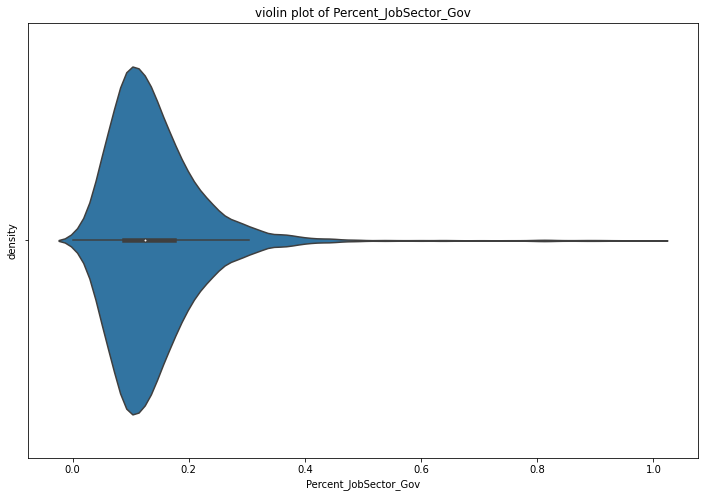

count    19215.000000
mean         0.171585
std          0.117181
min          0.000000
25%          0.083204
50%          0.147368
75%          0.231932
max          0.810443
Name: Percent_Medicaid, dtype: float64

In [40]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_JobSector_Gov', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent_JobSector_Gov', ylabel= 'density', title='violin plot of Percent_JobSector_Gov')
plt.show()

censusNeighborhoodData.Percent_Medicaid.describe()

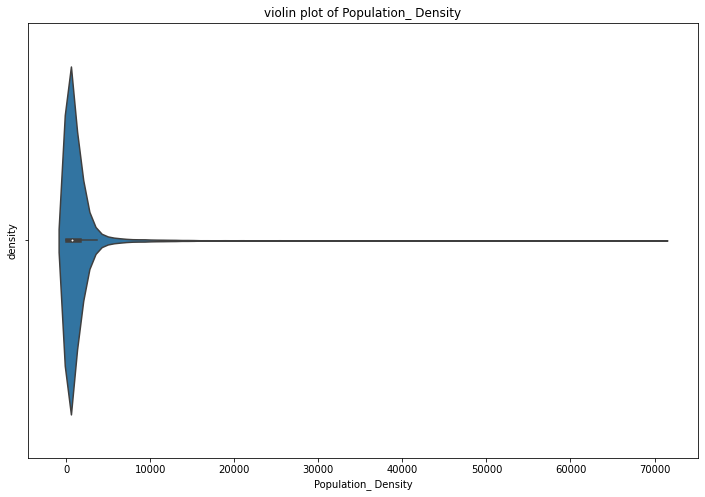

count    19168.000000
mean      1405.129357
std       3181.994741
min          0.000000
25%        162.230033
50%        727.320863
75%       1562.860628
max      70640.290323
Name: Population_Density, dtype: float64

In [44]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Population_Density', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Population_ Density', ylabel= 'density', title='violin plot of Population_ Density')
plt.show()

censusNeighborhoodData.Population_Density.describe()

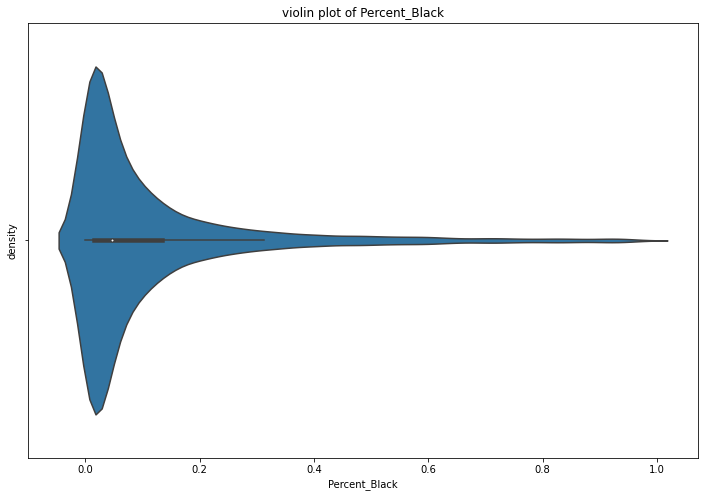

count    19167.000000
mean         0.114173
std          0.168346
min          0.000000
25%          0.014324
50%          0.046744
75%          0.133367
max          0.971230
Name: Percent_Black, dtype: float64

In [43]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_Black', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent_Black', ylabel= 'density', title='violin plot of Percent_Black')
plt.show()

censusNeighborhoodData.Percent_Black.describe()

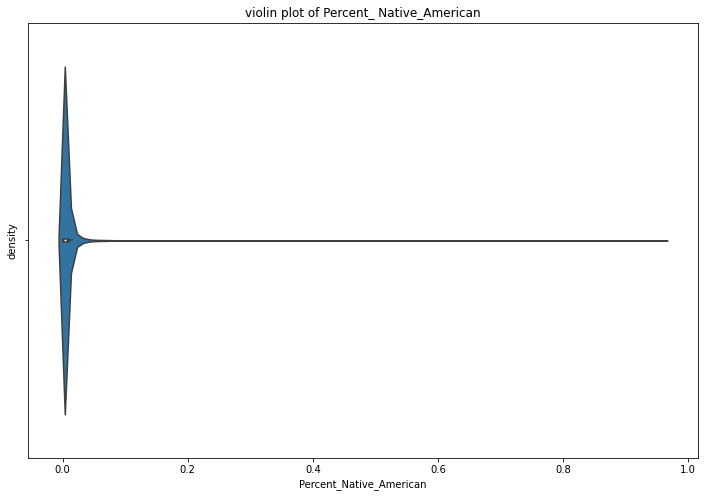

count    19167.000000
mean         0.007651
std          0.022430
min          0.000000
25%          0.002125
50%          0.003883
75%          0.007405
max          0.960373
Name: Percent_Native_American, dtype: float64

In [46]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_Native_American', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent_Native_American', ylabel= 'density', title='violin plot of Percent_ Native_American')
plt.show()

censusNeighborhoodData.Percent_Native_American.describe()

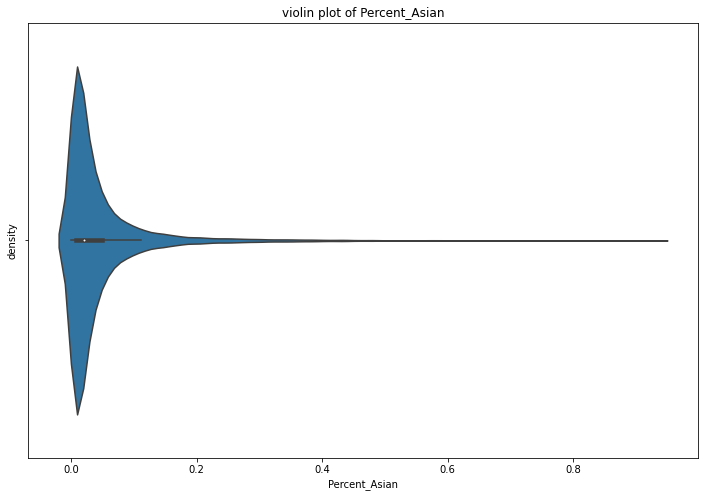

count    19167.000000
mean         0.044728
std          0.072981
min          0.000000
25%          0.007181
50%          0.019658
75%          0.049044
max          0.930004
Name: Percent_Asian, dtype: float64

In [47]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_Asian', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent_Asian', ylabel= 'density', title='violin plot of Percent_Asian')
plt.show()

censusNeighborhoodData.Percent_Asian.describe()

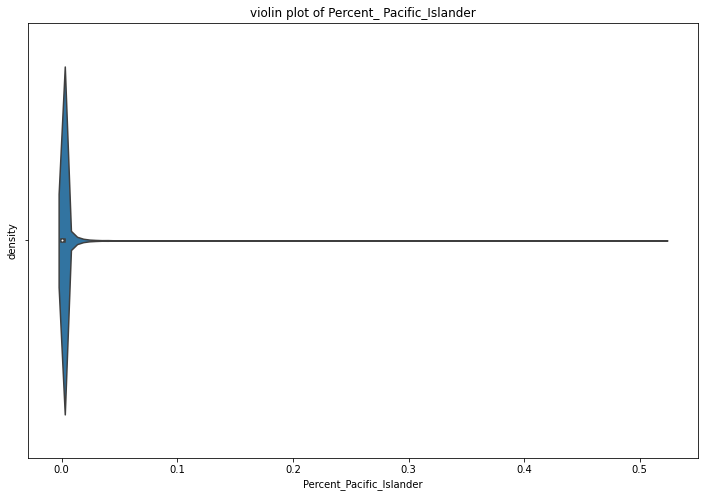

count    19167.000000
mean         0.001579
std          0.009403
min          0.000000
25%          0.000000
50%          0.000350
75%          0.001032
max          0.521259
Name: Percent_Pacific_Islander, dtype: float64

In [51]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_Pacific_Islander', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent_Pacific_Islander', ylabel= 'density', title='violin plot of Percent_ Pacific_Islander')
plt.show()

censusNeighborhoodData.Percent_Pacific_Islander.describe()

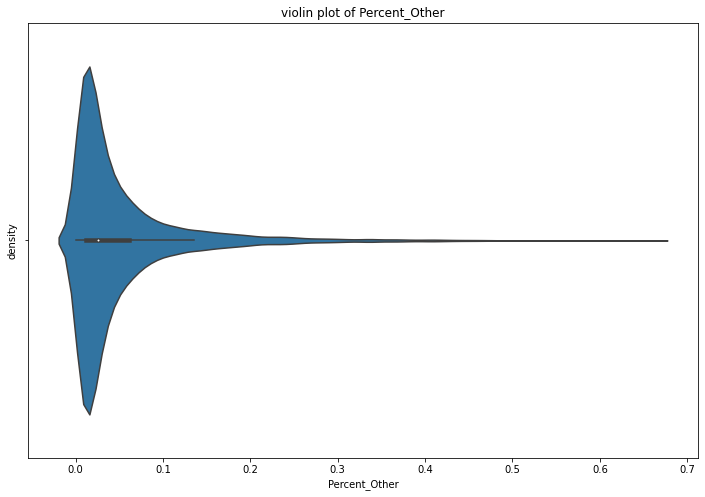

count    19167.000000
mean         0.051924
std          0.069562
min          0.000000
25%          0.011846
50%          0.025446
75%          0.061244
max          0.657932
Name: Percent_Other, dtype: float64

In [52]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_Other', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent_Other', ylabel= 'density', title='violin plot of Percent_Other')
plt.show()

censusNeighborhoodData.Percent_Other.describe()

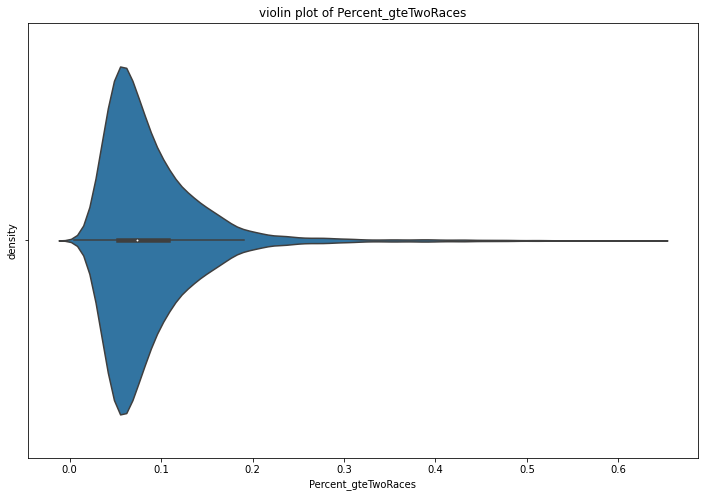

count    19167.000000
mean         0.089248
std          0.058696
min          0.004360
25%          0.053266
50%          0.073910
75%          0.108066
max          0.637171
Name: Percent_gteTwoRaces, dtype: float64

In [54]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_gteTwoRaces', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent_gteTwoRaces', ylabel= 'density', title='violin plot of Percent_gteTwoRaces')
plt.show()

censusNeighborhoodData.Percent_gteTwoRaces.describe()

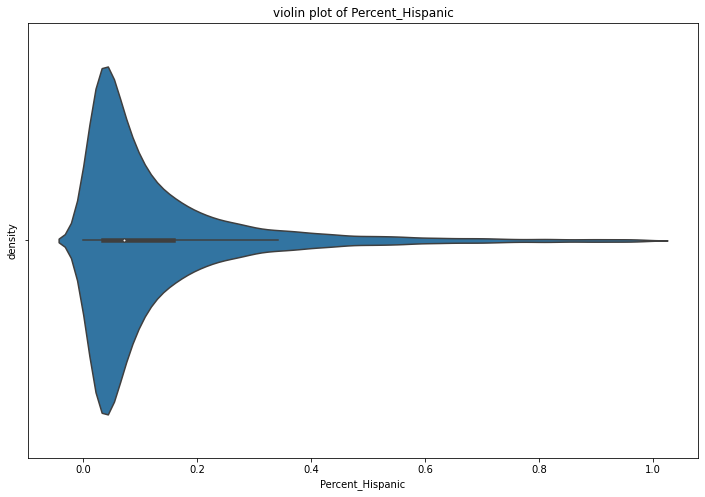

count    19167.000000
mean         0.129679
std          0.154434
min          0.000000
25%          0.035590
50%          0.072301
75%          0.157946
max          0.982487
Name: Percent_Hispanic, dtype: float64

In [55]:
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(x = 'Percent_Hispanic', data=censusNeighborhoodData, orient="h")
ax1.set(xlabel='Percent_Hispanic', ylabel= 'density', title='violin plot of Percent_Hispanic')
plt.show()

censusNeighborhoodData.Percent_Hispanic.describe()

**Summary:**

In the dataset comprising 19,167 records, the average percentage of Hispanic individuals is 12.97%. The data ranges from 0% to 98.25%, indicating substantial variability. The median value is 7.23%, reflecting the middle point of the distribution. The interquartile range, between 3.56% and 15.79%, demonstrates the spread of the data within the middle 50%. The presence of a maximum value of 98.25% suggests areas with a notably high Hispanic population.